# Solar Spectrum:

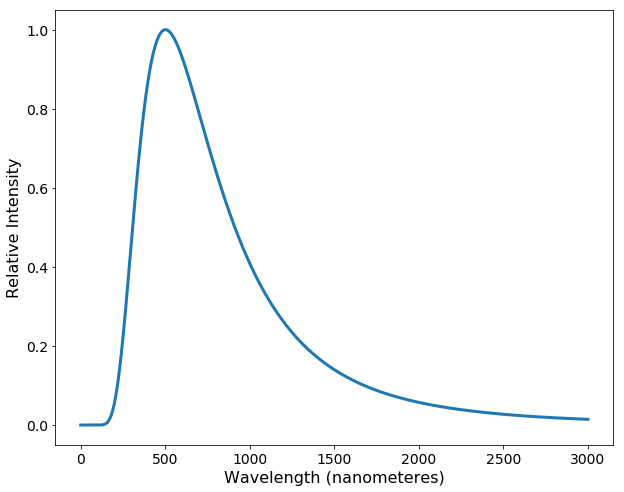

5.021830183018302e-07

In [2]:
import numpy as np
import matplotlib.pyplot as plt

c = 3e8          # Speed of light
h = 6.626e-34    # Planck's constant
T = 5778         # Sun surface temperature
k = 1.38e-23     # Boltzmann constant
wavelength = np.linspace(1e-9,3000e-9,10000)

spectrum = 2*h*c**2/(wavelength**5) * 1 / (np.exp(h*c/(wavelength*k*T)) - 1)


fig = plt.figure(figsize = [10,8])
plt.plot(wavelength*1e9,spectrum/max(spectrum),linewidth = 3)
plt.ylabel('Relative Intensity', fontsize = 16)
plt.xlabel('Wavelength (nanometeres)', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

wavelength[np.argmax(spectrum)]

# Effect of Rayleigh Scattering

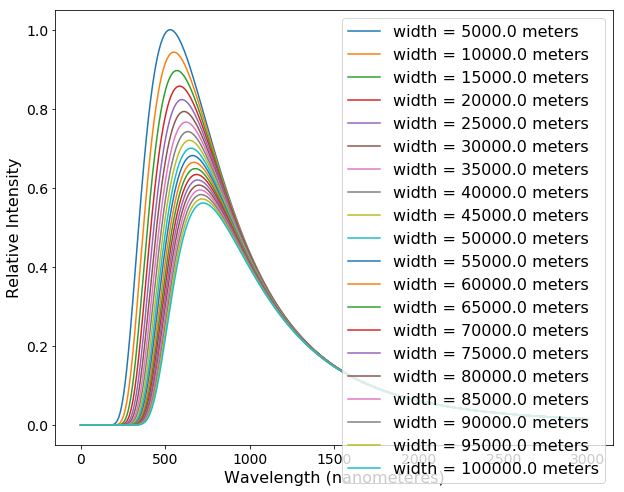

In [3]:
ref_index = 2.78e-4    # (n-1)
N = 2.55e25            # air molecule per meter^3 
number = 20            # number of widths analyzed

alpha = 32*np.pi**3 / (3*N*wavelength**4) * ref_index**2

spectrum_scatt = np.zeros([number,10000])


width = np.linspace(5000,100000,number)

fig = plt.figure(figsize = [10,8])

maxWavelength = np.zeros(number)

i=0
for d in width:
    spectrum_scatt[i,:] = spectrum*np.exp(-alpha * d)
    plt.plot(wavelength*10**9, spectrum_scatt[i,:]/max(spectrum_scatt[0,:]), label = "width = {} meters".format(d))
#     plt.scatter(wavelength[np.argmax(spectrum_scatt[i,:])]*10**9,np.max(spectrum_scatt[i,:]))
#     print(np.argmax(spectrum_scatt[i,:]))
    maxWavelength[i] = wavelength[np.argmax(spectrum_scatt[i,:])]*10**9
    i+=1
    
plt.legend(fontsize = 16)
plt.ylabel('Relative Intensity', fontsize = 16)
plt.xlabel('Wavelength (nanometeres)', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
    


## Width / Wavelength Fitting

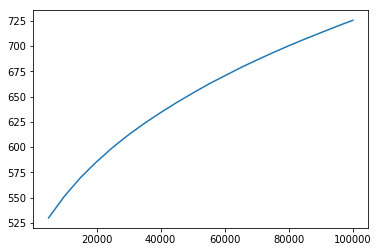

In [4]:
wl = maxWavelength
wlData = np.array([607.3066667, 607.5333333, 607.76, 604.8133333, 606.6266667, 606.6266667, 605.72, 605.72, 606.4, 607.3066667, 607.08, 607.76, 608.44, 609.12, 609.8, 610.7066667, 611.3866667, 612.0666667, 612.7466667, 613.4266667])

plt.plot(width,wl)

In [5]:
wl

array([530.07650765, 551.67146715, 569.96719672, 585.56355636,
       599.66026603, 612.25732573, 623.65466547, 634.15221522,
       644.04990499, 653.34773477, 662.34563456, 670.44374437,
       678.54185419, 686.04010401, 693.23842384, 700.13681368,
       706.73527353, 713.03380338, 719.33233323, 725.33093309])

In [82]:
from scipy import optimize

def test_func(x, a, b, c, d):
    return a * x + b * x**2 + c*x**3 + d

params, params_covariance = optimize.curve_fit(test_func, wl, width)

print(params)

[ 9.94686979e+02 -2.48336703e+00  2.19000860e-03 -1.50666480e+05]


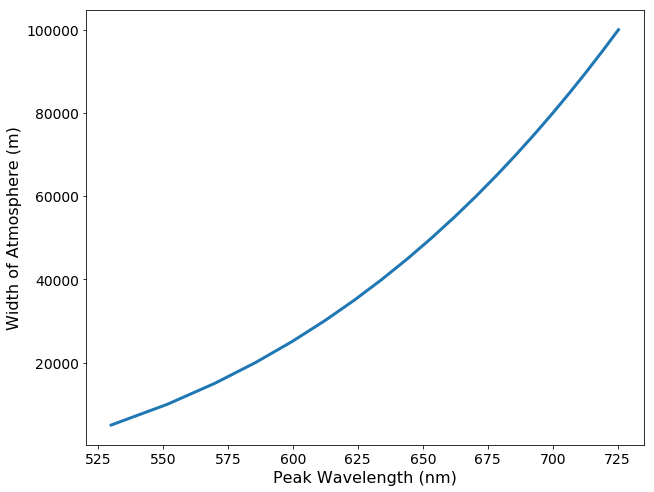

In [83]:
[a,b,c,d] = params
fig = plt.figure(figsize = [10,8])
plt.plot(wl, a * wl + b * wl**2 + c * wl**3 + d, linewidth = 3)
# plt.plot(wl,width,'-.', linewidth = 3)
plt.xlabel("Peak Wavelength (nm)", fontsize = 16)
plt.ylabel("Width of Atmosphere (m)", fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

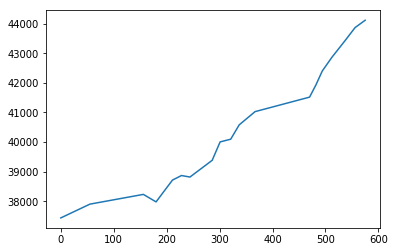

In [84]:
HueData = np.array([28.44, 27.108, 26.172, 26.892, 25.74, 24.804, 24.372, 24.516, 22.932, 21.204, 20.952, 19.62, 18.396, 17.064, 15.948, 14.688, 13.464, 12.024, 10.8, 10.152])
wlData = 650 - 200*HueData/270



calcWidths = a*wlData + b*wlData**2 + c*wlData**3 + d
timeData = [0, 55, 156, 180, 197, 211, 228, 244, 286, 301, 321, 337, 367, 470, 482, 494, 512, 536, 556, 575]
plt.plot(timeData,calcWidths)


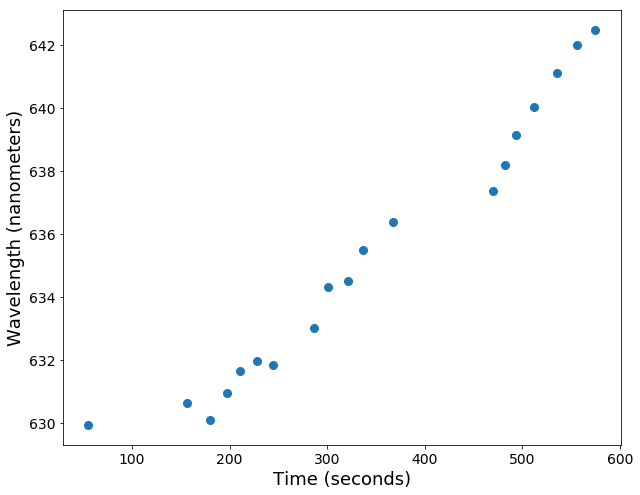

In [85]:
fig = plt.figure(figsize = [10,8])
plt.plot(timeData[1:],wlData[1:],'o', markersize = 8)
plt.xlabel('Time (seconds)',fontsize = 18)
plt.ylabel('Wavelength (nanometers)', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=14)

## Dont Need This 

In [86]:


ref_index = 2.78e-4    # (n-1)
N = 2.69e25            # air molecule per meter^3 

alpha = 32*np.pi**3 / (3*N*wavelength**4) * ref_index**2

spectrum_scatt = np.zeros([1000,3000])
blue_to_red = np.zeros(1000)
redness = np.zeros(1000)

width = np.linspace(10000,100000,1000)

i=0
for d in width:
    spectrum_scatt[i,:] = spectrum*np.exp(-alpha * d)
#     plt.plot(wavelength*1e9, spectrum_scatt[i,:], label = "thickness = {} m".format(d))
    blue_to_red[i] = spectrum_scatt[i,430] / spectrum_scatt[i,650]
    redness[i] = (spectrum_scatt[i,430] + spectrum_scatt[i,650])/2 - spectrum_scatt[i,540]
    
    i+= 1   

fig = plt.figure(figsize = [10,8])
plt.plot(width,blue_to_red, label= "Ratio of blue to red in atmosphere")
plt.xlabel("width of atmosphere (m)", fontsize = 16)
plt.ylabel("Ratio of blue to red in atmosphere", fontsize = 16)
# plt.legend(fontsize =16)
plt.show()

fig = plt.figure(figsize = [10,8])
plt.plot(width,redness, label= "Redness")
plt.xlabel("width of atmosphere (m)", fontsize = 16)
plt.ylabel("Redness", fontsize = 16)
# plt.legend(fontsize =16)
plt.show()




# plt.xlim([0,1500])




ValueError: could not broadcast input array from shape (10000) into shape (3000)

# Depth of atmosphere as function of viewing angle

### Oliver's Method (Approximate)

In [87]:
R = 6378*1e3
w = 8719

theta = np.linspace(0,np.pi/2,1000)

alpha = np.arctan(np.sqrt((R+w)**2 - R**2)/w)

d1 = (np.sqrt((R+w)**2 - R**2)/np.sin(alpha+theta)) * np.sin(np.pi/2 - alpha)

### David's Method (Exact)

In [88]:
d2_plus = -R*np.cos(theta) + np.sqrt((R*np.cos(theta))**2 + w * (2*R + w))
d = np.linspace(1e4,3.5e5,1000)
theta_d = np.arccos((-d**2 + 2*R*w +w**2)/(2*d*R))


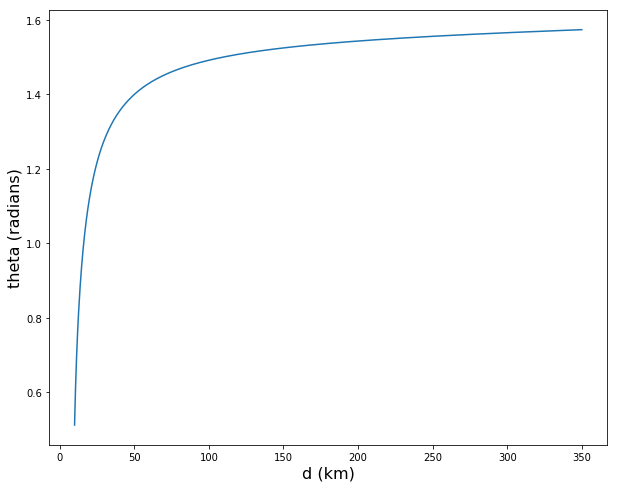

In [89]:
fig = plt.figure(figsize = [10,8])
plt.plot(d*1e-3,theta_d)
plt.xlabel("d (km)", fontsize = 16)
plt.ylabel("theta (radians)", fontsize = 16)
plt.show()



## Angles from Data

[7.16978781e-05 1.33196703e+00]


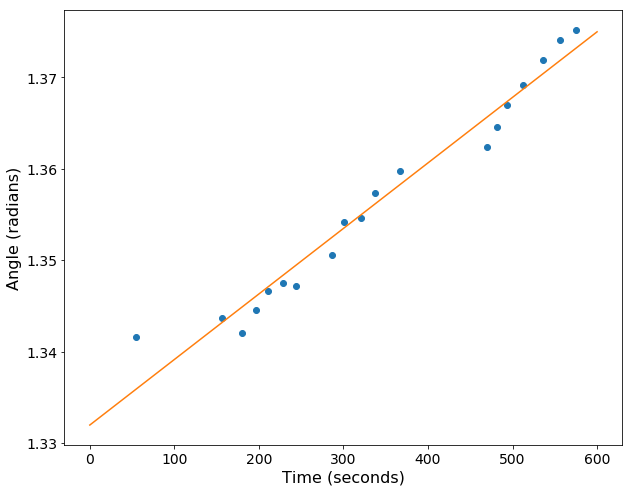

In [96]:
w = 8719
# w= 1000
thetaCalc = np.arccos((-calcWidths**2 + 2*R*w +w**2)/(2*calcWidths*R))


def test_func2(x, a, b):
    return a * x + b 

params, params_covariance = optimize.curve_fit(test_func2, timeData[1:], thetaCalc[1:])

print(params)
[a,b] = params


xfit = np.linspace(0,600,100)
yfit = a*xfit + b


fig = plt.figure(figsize = [10,8])
plt.plot(timeData[1:],thetaCalc[1:],'o')
plt.plot(xfit,yfit)
plt.xlabel('Time (seconds)', fontsize = 16)
plt.ylabel('Angle (radians)', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

In [98]:
angVel = a
hoursInADay = 2*np.pi/angVel / 3600
print("The number of hours in a day is {}".format(hoursInADay))

.34*60

The number of hours in a day is 24.342829904042105


20.400000000000002

## Putting it all together

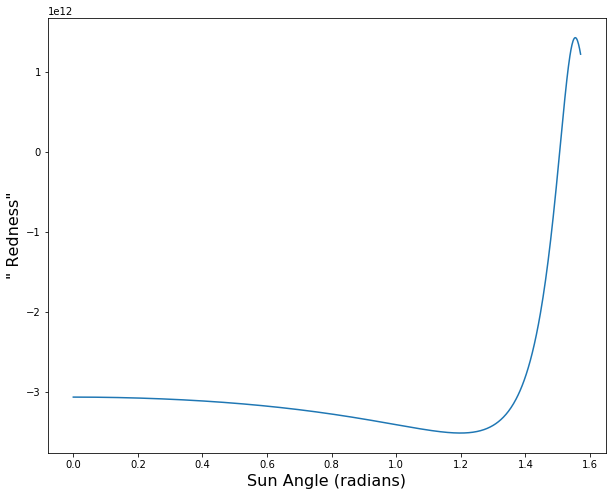

In [13]:
ref_index = 2.78e-4    # (n-1)
N = 2.69e25            # air molecule per meter^3 

alpha = 32*np.pi**3 / (3*N*wavelength**4) * ref_index**2

spectrum_scatt = np.zeros([1000,3000])
blue_to_red = np.zeros(1000)


theta = np.linspace(0,np.pi/2,1000)
thickness = -R*np.cos(theta) + np.sqrt((R*np.cos(theta))**2 + w * (2*R + w))

i=0
for d in thickness:
    spectrum_scatt[i,:] = spectrum*np.exp(-alpha * d)
#     plt.plot(wavelength*1e9, spectrum_scatt[i,:], label = "thickness = {} m".format(d))
    blue_to_red[i] = spectrum_scatt[i,430] / spectrum_scatt[i,650]
    redness[i] = (spectrum_scatt[i,430] + spectrum_scatt[i,650])/2 - spectrum_scatt[i,540]
    
    i+= 1   

fig = plt.figure(figsize = [10,8])
plt.plot(theta,redness, label= "redness in atmosphere")
plt.xlabel("Sun Angle (radians)", fontsize = 16)
plt.ylabel("\" Redness\"", fontsize = 16)
# plt.legend(fontsize =16)
plt.show()



## Pressure vs. Height

In [27]:
P1 = 101325*(1-2.2577e-5*h)**5.2588

In [ ]:
P2 = P0*exp(-m*g*h/(kB*T))